<a href="https://colab.research.google.com/github/oliverdillon/Machine_Learning_For_Medical_Images/blob/master/Machine_Learning_for_Medical_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!df -h
!cat /proc/cpuinfo
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()

In [ ]:
#===================MOUNT GOOGLE DRIVE===================#
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#===================IMPORTING GITHUB FILES===================#
!git clone https://github.com/oliverdillon/Machine_Learning_For_Medical_Images

Cloning into 'Machine_Learning_For_Medical_Images'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 225 (delta 141), reused 151 (delta 70), pack-reused 0
Receiving objects: 100% (225/225), 5.66 MiB | 4.35 MiB/s, done.
Resolving deltas: 100% (141/141), done.


In [ ]:
#===================REMOVING GITHUB FILES===================#
!rm -rf Machine_Learning_For_Medical_Images

In [ ]:
#pip install pydicom
pip install dicompyler-core

     |████████████████████████████████| 35.3MB 88kB/s 


In [ ]:
#===================IMPORT LIBRARIES===================#
%tensorflow_version 2.x
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import tensorflow as tf

#===================IMPORT PYTHON NOTEBOOK===================#
from Machine_Learning_For_Medical_Images import Models
from Machine_Learning_For_Medical_Images import Image_Data_Generatorv2

In [ ]:
import glob
googledirectory ="gdrive/My Drive/Colab/"
DirectoryDict = {"3Class2Channel3D":googledirectory+"Classification",
                 "3Class2Channel3D_Aug":googledirectory+"Consistency Check",
                 "3Class2Channel3D_Aug_Extra":googledirectory+"Consistency Check/Extra",
                 "3Class2Channel3D_Not Windowed":googledirectory+"Classification/Not Windowed",
                }
key_Dict = "3Class2Channel3D_Aug_Extra"
no_classes = 3
TrainingFeatures = glob.glob(DirectoryDict[key_Dict]+"/Training/Features/[!P]*")
TrainingLabels = glob.glob(DirectoryDict[key_Dict]+"/Training/Labels/[!P]*")

test_shape = np.load(TrainingFeatures[0])
print(TrainingFeatures[0])
print(test_shape.shape)

#Initialise Values
X= sorted(TrainingFeatures)
y= sorted(TrainingLabels)

Start_Partition_Index=0
End_Partition_Index=index = int(round(len(X)*0.1,0))-1

X_Val =X[Start_Partition_Index:End_Partition_Index]
y_Val =y[Start_Partition_Index:End_Partition_Index]

trueCount =0
shiftCount =0
augCount =0
errorCount =0
for val in y_Val:
  if (val.find("Aug")!=-1):
    augCount+=1
  elif (val.find("Shift")!=-1):
    shiftCount+=1
  elif (val.find("Translate")!=-1):
    errorCount+=1
  else:
    trueCount+=1  

print("True: {:}, Aug: {:}, Shift: {:}".format(trueCount,augCount,shiftCount))
print("Erroneous: {:}".format(errorCount))

gdrive/My Drive/Colab/Consistency Check/Extra/Training/Features/HNSCC-01-0001_Right_Parotid.npy
(371, 278, 45, 2)
True: 14, Aug: 14, Shift: 12
Errorneous: 13


In [ ]:
X_Train =X[End_Partition_Index:]
y_Train =y[End_Partition_Index:]

trueCount =0
shiftCount =0
augCount =0
errorCount =0
for train in y_Train:
  if (train.find("Aug")!=-1):
    augCount+=1
  elif (train.find("Shift")!=-1):
    shiftCount+=1
  elif (train.find("Translate")!=-1):
    errorCount+=1
  else:
    trueCount+=1  

print("True: {:}, Aug: {:}, Shift: {:}".format(trueCount,augCount,shiftCount))
print("Erroneous: {:}".format(errorCount))

True: 121, Aug: 121, Shift: 120
Erroneous: 122


In [ ]:
#===========================================================#
#                      CREATING MODEL                       #
#===========================================================#
import glob
googledirectory ="gdrive/My Drive/Colab/"
DirectoryDict = {"3Class2Channel3D":googledirectory+"Classification",
                 "3Class2Channel3D_Aug":googledirectory+"Consistency Check",
                 "3Class2Channel3D_Aug_Extra":googledirectory+"Consistency Check/Extra",
                 "3Class2Channel3D_Not Windowed":googledirectory+"Classification/Not Windowed",
                }
#===================LOAD DATA===================#
key_Dict = "3Class2Channel3D_Aug_Extra"
no_classes = 4
TrainingFeatures = glob.glob(DirectoryDict[key_Dict]+"/Training/Features/[!P]*")
TrainingLabels = glob.glob(DirectoryDict[key_Dict]+"/Training/Labels/[!P]*")

test_shape = np.load(TrainingFeatures[0])
print(TrainingFeatures[0])
print(test_shape.shape)

#Initialise Values
X= sorted(TrainingFeatures)
y= sorted(TrainingLabels)
FilterNumbers = [16,0,16,16,16,0,16,16,512]  
layers = ["Conv3D","Maxpool3D","Conv3D1","Conv3D1","Conv3D","Maxpool3D","Conv3D1","Conv3D1","Dense"]
#model = Models.build_3D_model(no_classes,test_shape.shape,layers,FilterNumbers)

gdrive/My Drive/Colab/Consistency Check/Extra/Training/Features/HNSCC-01-0001_Right_Parotid.npy
(371, 278, 45, 2)


In [ ]:
def saveParameters(layers,Epoch_no,key_Dict_Model):  
  #===================CREATE MODEL FOLDER===================#
  ModelDict = {"3Class2Channel3D":"gdrive/My Drive/Colab/Models/",
               "3Class2Channel3D_kFold":"gdrive/My Drive/Colab/Models/",
                "3Class2Channel3D_Aug":"gdrive/My Drive/Colab/Models/",
               "3Class2Channel3D_Aug_Extra":"gdrive/My Drive/Colab/Models/"}
  name = ModelDict[key_Dict_Model]+key_Dict_Model
  version =1
  ModelPath =name+"_Version:{:02d}".format(version)
  path = glob.glob(ModelPath)
  while(len(path)!=0):
    version+=1
    ModelPath =name+"_Version:{:02d}".format(version)
    path = glob.glob(ModelPath)
  os.mkdir(ModelPath)
  #===================SAVE PARAMETERS===================#
  parameter_print =""
  for i, layer in enumerate(layers):
        parameter_print += layer+": {:3.2f}, ".format(FilterNumbers[i])
  f = open(ModelPath+"/Parameters.txt", "w")
  f.write(parameter_print+"Epoch_No:%2i"%Epoch_no)
  f.close()

  return ModelPath

In [ ]:
#===========================================================#
#                      TRAINING                             #
#===========================================================#
from tensorflow.keras.callbacks import ModelCheckpoint,LambdaCallback
def training(ModelPath,Epoch_no,X,y,Start_Partition_Index,End_Partition_Index):

  #===================CALLBACKS===================#
  #Saves model after each epoch
  CheckpointPath =ModelPath+"/Checkpoints"
  os.mkdir(CheckpointPath)
  filepath = CheckpointPath+"/Epoch:{epoch:02d}_Val_Acc:{val_accuracy:.3f}_Val_Loss:{val_loss:.3f}"
  checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
  #checkpoint2 = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
  batch_print_callback = LambdaCallback( on_batch_begin=lambda batch,logs: print(batch))
  callbacks_list = [checkpoint1,batch_print_callback]

  #===================DATA GENERATORS===================# 
  stepSize = 2

  X_train = np.concatenate([ X[:Start_Partition_Index], X[End_Partition_Index:]],axis=0)
  y_train = np.concatenate([ y[:Start_Partition_Index], y[End_Partition_Index:]],axis=0)
  print("Length of training: {:d}".format(len(X_train)))
  training_steps_per_epoch = int(round(len(X_train))/stepSize)
  training_generator = Image_Data_Generatorv2.Data_Generator_3D(X_train, y_train, stepSize)

  X_Val =X[Start_Partition_Index:End_Partition_Index]
  y_Val =y[Start_Partition_Index:End_Partition_Index]

  validation_steps_per_epoch = int(round(len(X_Val))/stepSize)
  validation_generator = Image_Data_Generatorv2.Data_Generator_3D(X_Val, y_Val, stepSize)

  #===================TRAINING===================#
  model = Models.build_3D_model(no_classes,test_shape.shape,layers,FilterNumbers)
  history = model.fit_generator(generator=training_generator, steps_per_epoch =training_steps_per_epoch,
                                validation_data=validation_generator, validation_steps=validation_steps_per_epoch,
                                epochs = Epoch_no, verbose = 2, max_queue_size =1,callbacks=callbacks_list)
  

  return history, model,Epoch_no 

In [ ]:
#===================RUN TRAINING===================#
index1 = 0
index2 = int(round(len(X)*0.1,0))-1
Epoch_no =15
key_Dict_Model = "3Class2Channel3D_Aug_Extra"
ModelPath =saveParameters(layers,Epoch_no,key_Dict_Model)
history, model,Epoch_no = training(ModelPath,Epoch_no,X,y,index1,index2)

#===================SAVE METRICS===================#
def saveMetrics(history,model,path):
    np.savetxt(path+"/Validation Accuracy.csv", np.array(history.history['val_accuracy']), delimiter=",")
    np.savetxt(path+"/Validation Loss.csv", np.array(history.history['val_loss']), delimiter=",")
    np.savetxt(path+"/Accuracy.csv", np.array(history.history['accuracy']), delimiter=",")
    np.savetxt(path+"/Loss.csv", np.array(history.history['loss']), delimiter=",")

    
    epochNums =[]
    for i in range(len(history.history['accuracy'])):
      epochNums.append(i+1)
    # Plot training & validation accuracy values
    fig, ax = plt.subplots(1)
    ax.plot(epochNums,history.history['accuracy'],'x')
    ax.plot(epochNums,history.history['val_accuracy'],'x')
    ax.set_title(key_Dict+'-Model Accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.set_xlim(xmin=0)
    ax.legend(['Training', 'Validation'], loc='lower right')
    fig.savefig(path+"/Accuracy.png")
    plt.show(fig)

    diff = [1-acc for acc in history.history['accuracy'] ]
    val_diff = [1-val_acc for val_acc in history.history['val_accuracy'] ]

    # Plot training & validation accuracy values
    fig, ax = plt.subplots(1)
    ax.plot(epochNums,diff,'x')
    ax.plot(epochNums,val_diff,'x')
    ax.set_title(key_Dict+'-Model Error')
    ax.set_ylabel('Error')
    ax.set_yscale("log")
    ax.set_xlabel('Epoch')
    ax.set_xlim(xmin=0)
    ax.legend(['Training', 'Validation'], loc='upper right')
    fig.savefig(path+"/Error.png")
    plt.show(fig)


    # Plot training & validation loss values
    fig, ax = plt.subplots(1)
    ax.plot(epochNums,history.history['loss'],'x')
    ax.plot(epochNums,history.history['val_loss'],'x')
    ax.set_title(key_Dict+'-Model Loss')
    ax.set_ylabel('Loss')
    ax.set_yscale("log")
    ax.set_xlabel('Epoch')
    ax.set_xlim(xmin=0)
    ax.legend(['Training', 'Validation'], loc='upper right')
    fig.savefig(path+"/Loss.png")
    plt.show(fig)

saveMetrics(history,model,ModelPath)

Length of training: 484
Shuffle
Shuffle


ResourceExhaustedError: ignored

In [ ]:
#===================K-FOLD VALIDATION===================#
googledirectory ="gdrive/My Drive/Colab/"
DirectoryDict = {"3Class2Channel3D":googledirectory+"Classification",
                "3Class2Channel3D_Aug":googledirectory+"Consistency Check",
                "3Class2Channel3D_Not Windowed":googledirectory+"Not Windowed",
                "3Class2Channel3D_Bright":googledirectory+"Classification/Bright"
                }
ModelDict = {"3Class2Channel3D":"gdrive/My Drive/Colab/Models/",
              "3Class2Channel3D_kFold":"gdrive/My Drive/Colab/Models/"}
key_Dict_Model = "3Class2Channel3D_kFold"
TestingFeatures = glob.glob(DirectoryDict[key_Dict]+"/Testing/Features/[!P]*")
TestingLabels = glob.glob(DirectoryDict[key_Dict]+"/Testing/Labels/[!P]*")
X_test= sorted(TestingFeatures)
y_test= sorted(TestingLabels)
version=1
continuecheck = True
initialFold = 3


def nFold(n,layers,X,y,X_test,y_test,Epoch_no,key_Dict_Model,version,continuecheck,initialFold):
  #Alters whether a model is being started or continued
  if(continuecheck==True):
    name = ModelDict[key_Dict_Model]+key_Dict_Model
    ModelPath =name+"_Version:{:02d}".format(version)
    FoldPath =ModelPath+"/Fold:{:02d}".format(initialFold)
    path = glob.glob(FoldPath)

    while(len(path)!=0):
      initialFold+=1
      FoldPath =ModelPath+"/Fold:{:02d}".format(initialFold)
      path = glob.glob(FoldPath)
  else:
    ModelPath =saveParameters(layers,Epoch_no,key_Dict_Model)
  num_val_samples =int(len(X)/n)
  
  #Folds:
  for i in range (initialFold,n):
      #Indices
      Start_Partition_Index= i*num_val_samples
      End_Partition_Index= (i+1)*num_val_samples
      print ("Fold:{:02d}".format(i))

      #Training fold
      FoldPath =ModelPath+"/Fold:{:02d}".format(i)
      os.mkdir(FoldPath)
      history, model,Epoch_no = training(FoldPath,Epoch_no,X,y,Start_Partition_Index,End_Partition_Index)
      
      #Record Metrics
      accuracy_history = history.history['accuracy']
      loss_history = history.history['loss']
      val_accuracy_history = history.history['val_accuracy']
      val_loss_history = history.history['val_loss']

      #Evaluate Fold Model
      X_Val =X[Start_Partition_Index:End_Partition_Index]
      y_Val =y[Start_Partition_Index:End_Partition_Index]

      #Testing Evaluatation
      stepSize=2
      testing_steps_per_epoch = int(round(len(X_test))/stepSize)
      testing_generator = Image_Data_Generatorv2.Data_Generator_3D(X_test, y_test, stepSize)
      test_loss, test_acc =model.evaluate_generator(testing_generator,steps =testing_steps_per_epoch,max_queue_size=1,verbose=0)

      #Save Values
      np.savetxt(FoldPath+"/Accuracy.csv", np.array(accuracy_history), delimiter=",")
      np.savetxt(FoldPath+"/Loss.csv", np.array(loss_history), delimiter=",")

      np.savetxt(FoldPath+"/Validation Accuracy.csv", np.array(val_accuracy_history), delimiter=",")
      np.savetxt(FoldPath+"/Validation Loss.csv", np.array(val_loss_history), delimiter=",")

      metrics = []
      metrics.append(test_acc)
      metrics.append(test_loss)

      np.savetxt(FoldPath+"/Metrics.csv", np.array(metrics), delimiter=",")
      print("First Index: {:02d}, Second Index: {:02d}/ FIN".format(Start_Partition_Index,End_Partition_Index))
  
  return ModelPath
n=10
Epoch_no =15
ModelPath = nFold(n,layers,X,y,X_test,y_test,Epoch_no,key_Dict_Model,version,continuecheck,initialFold)

Fold:03
Length of training: 361
Shuffle
Shuffle
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 369, 276, 43, 16)  880       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 184, 138, 21, 16)  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 182, 136, 19, 16)  6928      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 91, 68, 9, 16)     0         
_________________________________________________________________
flatten (Flatten)            (None, 891072)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               456229376 
_________________________________________________________________
dense_1 

3Class2Channel3D_kFold


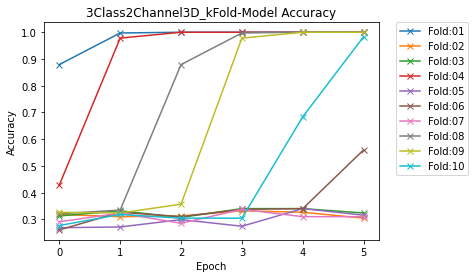

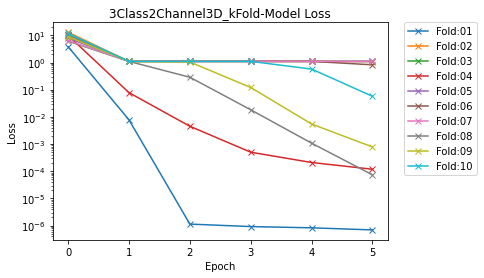

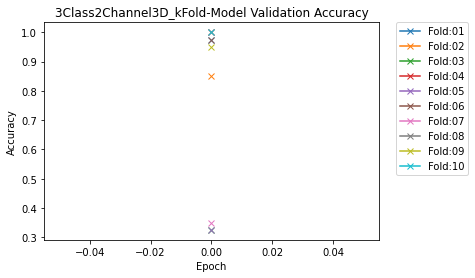

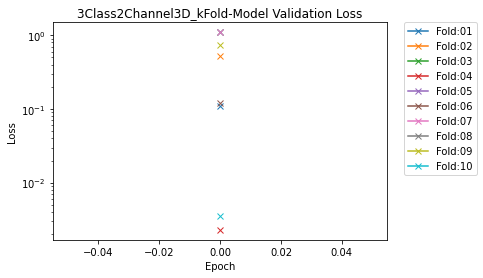

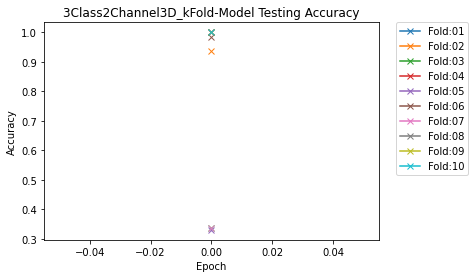

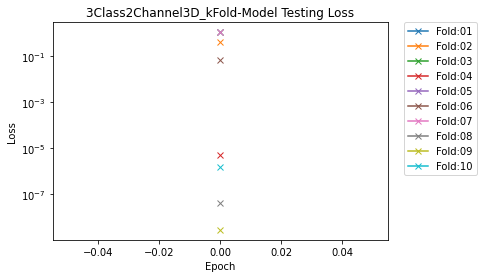

In [ ]:
#===================SAVE kFold METRICS===================#
def savekFoldMetrics(n,path,key_Dict_Model):
    all_acc_history =[]
    all_loss_history =[]
    all_val_acc=[]
    all_val_loss=[]
    all_test_acc=[]
    all_test_loss=[]

    for i in range (0,n):
      FoldPath =ModelPath+"/Fold:{:02d}".format(i)
      accuracy_history = np.genfromtxt(FoldPath+"/Accuracy.csv", delimiter = ',')
      loss_history = np.genfromtxt(FoldPath+"/Loss.csv", delimiter = ',')
      val_acc = np.genfromtxt(FoldPath+"/Validation Accuracy.csv", np.array(val_accuracy_history), delimiter=",")
      val_loss = np.genfromtxt(FoldPath+"/Validation Loss.csv", np.array(val_loss_history), delimiter=",")

      metrics = np.genfromtxt(FoldPath+"/Metrics.csv", delimiter = ',')

      all_acc_history.append(accuracy_history)
      all_loss_history.append(loss_history)
      all_val_acc.append(val_acc)
      all_val_loss.append(val_loss])
      all_test_acc.append(metrics[0])
      all_test_loss.append(metrics[1])
    
    np.savetxt(ModelPath+"/Accuracy.csv", np.array(all_acc_history), delimiter=",")
    np.savetxt(ModelPath+"/Loss.csv", np.array(all_loss_history), delimiter=",")
    np.savetxt(ModelPath+"/Validation Accuracy.csv", np.array(all_val_acc), delimiter=",")
    np.savetxt(ModelPath+"/Validation Loss.csv", np.array(all_val_loss), delimiter=",")
    np.savetxt(ModelPath+"/Testing Accuracy.csv", np.array(all_test_acc), delimiter=",")
    np.savetxt(ModelPath+"/Testing Loss.csv", np.array(all_test_loss), delimiter=",")
    
    #===================TRAINING===================#
    folds = []
    for i in range(n):
      folds.append("Fold:{:02d}".format(i+1))
    
    #ACCURACY
    fig, ax = plt.subplots()
    for i in range(n):
      ax.plot(all_acc_history[i],'x',linestyle="solid",label =folds[i])
    ax.set_title(key_Dict_Model+'-Model Accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(path+"/Accuracy.png", bbox_inches=extent.expanded(1.8,1.8))
    plt.show()

    #LOSS
    fig, ax = plt.subplots()
    for i in range(n):
      ax.plot(all_loss_history[i],'x',linestyle="solid",label =folds[i])
    ax.set_title(key_Dict_Model+'-Model Loss')
    ax.set_ylabel('Loss')
    ax.set_yscale("log")
    ax.set_xlabel('Epoch')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.savefig(path+"/Loss.png", bbox_inches=extent.expanded(1.8,1.8))
    plt.show()

    #===================VALIDATION===================#
    #ACCURACY
    fig, ax = plt.subplots()
    for i in range(n):
      ax.plot(all_val_acc[i],'x',linestyle="solid",label =folds[i])
    ax.set_title(key_Dict_Model+'-Model Validation Accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.savefig(path+"/Validation Accuracy.png", bbox_inches=extent.expanded(1.8,1.8))
    plt.show()

    #LOSS
    fig, ax = plt.subplots()
    for i in range(n):
      ax.plot(all_val_loss[i],'x',linestyle="solid",label =folds[i])
    ax.set_title(key_Dict_Model+'-Model Validation Loss')
    ax.set_ylabel('Loss')
    ax.set_yscale("log")
    ax.set_xlabel('Epoch')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.savefig(path+"/Validation Loss.png", bbox_inches=extent.expanded(1.8,1.8))
    plt.show()

    #===================TESTING===================#
    #ACCURACY
    fig, ax = plt.subplots()
    for i in range(n):
      ax.plot(all_test_acc[i],'x',linestyle="solid",label =folds[i])
    ax.set_title(key_Dict_Model+'-Model Testing Accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.savefig(path+"/Testing Accuracy.png", bbox_inches=extent.expanded(1.8,1.8))
    plt.show()

    #LOSS
    fig, ax = plt.subplots()
    for i in range(n):
      ax.plot(all_test_loss[i],'x',linestyle="solid",label =folds[i])
    ax.set_title(key_Dict_Model+'-Model Testing Loss')
    ax.set_ylabel('Loss')
    ax.set_yscale("log")
    ax.set_xlabel('Epoch')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.savefig(path+"/Testing Loss.png", bbox_inches=extent.expanded(1.8,1.8))
    plt.show()

n=10
version=2
ModelDict = {"3Class2Channel3D":"gdrive/My Drive/Colab/Models/",
              "3Class2Channel3D_kFold":"gdrive/My Drive/Colab/Models/"}
key_Dict_Model = "3Class2Channel3D_kFold"
name = ModelDict[key_Dict_Model]+key_Dict_Model
ModelPath =name+"_Version:{:02d}".format(version)
print(key_Dict_Model)
savekFoldMetrics(n,ModelPath,key_Dict_Model)

In [ ]:
#===================MOUNT GOOGLE DRIVE===================#
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#===================IMPORTING GITHUB FILES===================#
!git clone https://github.com/oliverdillon/Machine_Learning_For_Medical_Images

Cloning into 'Machine_Learning_For_Medical_Images'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 210 (delta 131), reused 144 (delta 68), pack-reused 0
Receiving objects: 100% (210/210), 6.41 MiB | 4.73 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [ ]:
#===================REMOVING GITHUB FILES===================#
!rm -rf Machine_Learning_For_Medical_Images

In [ ]:
#===================IMPORT LIBRARIES===================#
%tensorflow_version 2.x
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import tensorflow as tf

#===================IMPORT PYTHON NOTEBOOK===================#
from Machine_Learning_For_Medical_Images import Models
from Machine_Learning_For_Medical_Images import Image_Data_Generatorv2

In [ ]:
#===========================================================#
#                      TESTING                              #
#===========================================================#
import glob
def loadModel(key_Dict,key_Dict_Model,desired,VersionNo,epochNo=1):
  #===================LOAD DATA===================#
  googledirectory ="gdrive/My Drive/Colab/"
  DirectoryDict = {"3Class2Channel3D":googledirectory+"Classification",
                  "3Class2Channel3D_Aug":googledirectory+"Consistency Check",
                  "3Class2Channel3D_Not Windowed":googledirectory+"Not Windowed",
                  "3Class2Channel3D_Bright":googledirectory+"Classification/Bright"
                  }

  TestingFeatures = glob.glob(DirectoryDict[key_Dict]+"/Testing/Features/[!P]*")
  TestingLabels = glob.glob(DirectoryDict[key_Dict]+"/Testing/Labels/[!P]*")
  X_test= sorted(TestingFeatures)
  y_test= sorted(TestingLabels)

  #===================LOAD MODEL DATA===================#
  modelsdirectory = "gdrive/My Drive/Colab/Models/"
  ModelDict = {"3Class2Channel3D":modelsdirectory,
              "3Class2Channel3D_Aug":modelsdirectory,
              "3Class2Channel3D_Not Windowed":modelsdirectory
              }          

  ModelName =ModelDict[key_Dict_Model]+"{:}_Version:{:02d}".format(key_Dict_Model,VersionNo)
  ModelCheckPath =ModelName+"/Checkpoints"
  ModelNames=os.listdir(ModelCheckPath)

  #===================LOAD MODEL===================#
  highestAccuracy = ModelCheckPath+"/"+ModelNames[0]
  desiredModel = ""

  for name in ModelNames: 
    if(name[6:8]=="{:02d}".format(epochNo)):
      epochModel = ModelCheckPath+"/"+name
    if(name[-5:]>highestAccuracy[-5:]):
      highestAccuracy = ModelCheckPath+"/"+name

  if(desired == "highestAccuracy"):
    desiredModel = highestAccuracy
  elif(desired.find("epoch")!=-1):
    desiredModel = epochModel

  print(desiredModel+"\n")
  new_model = tf.keras.models.load_model(desiredModel)

  return new_model,ModelName,desiredModel,X_test,y_test

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
def testModel(new_model,ModelName,desiredModel,key_Dict_Model,X_test,y_test):
  #===================INITIATE TESTING DATA===================#
  y_pred = []
  y_true = []
  neuralNetArray = []
  countDict = {}

  Bases = ["NoOf","NoOfPredicted","True","False"]
  if(key_Dict_Model.find("Aug")==-1):
    classes = ["RightParotid","LeftParotid","Brainstem"]
  else:
    classes = ["RightParotid","RightParotid_Shift","RightParotid_Aug"]
  Organs =[]

  for Class in classes:
    for  base in Bases:
      Organs.append(base+Class) 
  for Class1 in classes:
    for Class2 in classes:
        if(Class1!=Class2):
          Organs.append("Predicted"+Class1+"True"+Class2) 
  print(Organs)
  print("\n")

  for organ in Organs:
          countDict[organ] = 0

  #===================TESTING COUNTING===================#
  for i in range(0,len(X_test)):
      generator = Image_Data_Generatorv2.Predict_Data_Generator(X_test,i)
      result = new_model.predict(generator)
      resultindex = np.argmax(result) 
      testIndex = np.argmax(np.genfromtxt(y_test[i], delimiter = ',')) 
      y_pred.append(resultindex)
      y_true.append(testIndex) 

      yTest = np.genfromtxt(y_test[i], delimiter = ',')
      if(resultindex!=testIndex):
        print("Error with data:")
        print(X_test[i])

      for i,Class in enumerate(classes):
        if (yTest[i] ==1):
            #print(Class)
            countDict[Organs[4*i]]+=1    
      #print(yTest) 

      for i,Class in enumerate(classes):                     
        if (resultindex == i):
            print('Predicted == '+Class)    
            countDict[Organs[4*i+1]] +=1 
            if (resultindex == testIndex):
                #true
                countDict[Organs[4*i+2]]+=1
            else:
                #false
                gradient = len(classes)-1
                intercept = len(classes)*len(Bases)
                check =np.arange(len(classes)) 
                np.delete(check,i)
                for j,other in enumerate(check):
                  if(yTest[other] ==1):
                      countDict[Organs[gradient*i+intercept+j]]+=1
                countDict[Organs[4*i+3]]+=1
      print(result) 
      print("\n")


  #===================TESTING SUMMARY===================#
  trueCountSummary=""
  falseCountSummary=""
  truefalseBreakdown=""
  trueVpredicted=""

  for i,Class in enumerate(classes):
    trueCountSummary+= "No. of true {:}: {:3d}, ".format(Class,countDict[Organs[4*i+2]])
    falseCountSummary+= "No. of false {:}: {:3d}, ".format(Class,countDict[Organs[4*i+3]])
    
    others =classes.copy()
    others.remove(Class)
    truefalseBreakdown+= "Predicted {:}: ".format(Class)
    gradient = len(classes)-1
    intercept = len(classes)*len(Bases)
    for j,other in enumerate(others):
      truefalseBreakdown+= "{:}: {:3d}, ".format(other,countDict[Organs[gradient*i+intercept+j]])
    truefalseBreakdown+="\n"

    trueVpredicted += "No. of {:}: {:3d} and no. predicted: {:3d}\n".format(Class,countDict[Organs[4*i]],countDict[Organs[4*i+1]])

  report = classification_report(y_true, y_pred, target_names=classes)
  confusionMatrix = confusion_matrix(y_true, y_pred)

  print("\n\n")  
  print(trueCountSummary)
  print(falseCountSummary)
  print("\n\n") 
  print(truefalseBreakdown)
  print("\n\n")  
  print(trueVpredicted)

  print("Report:")
  print(report)
  print("Confusion Matrix:")
  print(confusionMatrix)

  Summary = "ModelName:\n{:} \n\nSummary: \n{:}\n{:}\n\n{:}\n{:}".format(desiredModel,trueCountSummary,falseCountSummary,truefalseBreakdown,trueVpredicted)
  Summary +="\n\nReport:\n{:}\nConfusion Matrix:\n{:}".format(report,confusionMatrix)

  f = open(ModelName+"/TestingSummary: {:}.txt".format(desiredModel[-22:]), "w")
  f.write(Summary)
  f.close()

In [ ]:
key_Dict = "3Class2Channel3D"
key_Dict_Model = "3Class2Channel3D"
desired = "highestAccuracy"
version = 4
new_model,ModelName,desiredModel,X_test,y_test =loadModel(key_Dict,key_Dict_Model,desired,version)
print("Check")
testModel(new_model,ModelName,desiredModel,key_Dict_Model,X_test,y_test)

gdrive/My Drive/Colab/Models/3Class2Channel3D_Version:01/Checkpoints/Epoch:02_Val_Acc:1.000

Check
['NoOfRightParotid', 'NoOfPredictedRightParotid', 'TrueRightParotid', 'FalseRightParotid', 'NoOfLeftParotid', 'NoOfPredictedLeftParotid', 'TrueLeftParotid', 'FalseLeftParotid', 'NoOfBrainstem', 'NoOfPredictedBrainstem', 'TrueBrainstem', 'FalseBrainstem', 'PredictedRightParotidTrueLeftParotid', 'PredictedRightParotidTrueBrainstem', 'PredictedLeftParotidTrueRightParotid', 'PredictedLeftParotidTrueBrainstem', 'PredictedBrainstemTrueRightParotid', 'PredictedBrainstemTrueLeftParotid']


gdrive/My Drive/Colab/Classification/Training/Features/HNSCC-01-0001_Brainstem.npy
Predicted == Brainstem
[[0. 0. 1.]]


gdrive/My Drive/Colab/Classification/Training/Features/HNSCC-01-0001_Left_Parotid.npy
Predicted == LeftParotid
[[0. 1. 0.]]


gdrive/My Drive/Colab/Classification/Training/Features/HNSCC-01-0001_Right_Parotid.npy
Predicted == RightParotid
[[1. 0. 0.]]


gdrive/My Drive/Colab/Classification/Tr

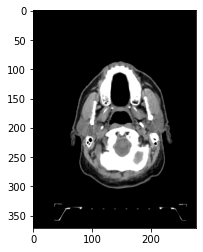

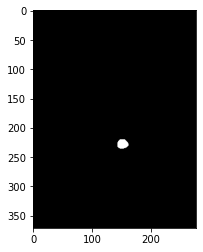

In [ ]:

import matplotlib.pyplot as plt

XNew = np.load("gdrive/My Drive/Colab/Classification/Training/Features/HNSCC-01-0015_Right_Parotid.npy")
XNew1= np.load("gdrive/My Drive/Colab/Classification/Training/Features/HNSCC-01-0087_Brainstem.npy")
XNew2 = np.load("gdrive/My Drive/Colab/Classification/Training/Features/HNSCC-01-0093_Right_Parotid.npy")
XNew3 = np.load("gdrive/My Drive/Colab/Classification/Training/Features/HNSCC-01-0097_Brainstem.npy")
XNew4 = np.load("gdrive/My Drive/Colab/Classification/Training/Features/HNSCC-01-0145_Brainstem.npy")
XNew5 = np.load("gdrive/My Drive/Colab/Classification/Training/Features/HNSCC-01-0145_Right_Parotid.npy")
XNew6 = np.load("gdrive/My Drive/Colab/Classification/Testing/Features/HNSCC-01-0180_Brainstem.npy")

XNew7 = np.array(XNew).reshape(45,371,278,2)

index=0
while(np.sum(XNew[index][...,1])==0):
  index+=1

plt.imshow(XNew[index][...,0],"gray")
plt.show()
plt.imshow(XNew[index][...,1],"gray")
plt.show()

In [ ]:
trueCountSummary=""
falseCountSummary=""
truefalseBreakdown=""
trueVpredicted=""

for i,Class in enumerate(classes):
  trueCountSummary+= "No. of true {:}: {:3d},".format(Class,countDict[Organs[4*i+2]])
  falseCountSummary+= "No. of false {:}: {:3d},".format(Class,countDict[Organs[4*i+3]])
  
  others =classes.copy()
  others.remove(Class)
  truefalseBreakdown+= "Predicted {:}:".format(Class)
  gradient = len(classes)-1
  intercept = len(classes)*len(Bases)
  
  for j,other in enumerate(others):
    truefalseBreakdown+= "{:}: {:3d},".format(other,countDict[Organs[gradient*i+intercept+j]])
  truefalseBreakdown+="\n"

  trueVpredicted += "No. of {:}: {:3d} and no. predicted: {:3d}".format(Class,countDict[Organs[12]],countDict[Organs[12]])

['RightParotid', 'LeftParotid', 'Brainstem']
['RightParotid', 'LeftParotid', 'Brainstem']
['RightParotid', 'LeftParotid', 'Brainstem']


IndexError: ignored

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ['Right Parotid', 'Right Parotid Aug', 'Right Parotid Shift']

print("Report:")
print(classification_report(y_true, y_pred, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(y_true, y_pred))

Report:
                     precision    recall  f1-score   support

      Right Parotid       1.00      1.00      1.00        42
  Right Parotid Aug       1.00      1.00      1.00        41
Right Parotid Shift       1.00      1.00      1.00        42

           accuracy                           1.00       125
          macro avg       1.00      1.00      1.00       125
       weighted avg       1.00      1.00      1.00       125

Confusion Matrix
[[42  0  0]
 [ 0 41  0]
 [ 0  0 42]]


In [ ]:
Organs = ["Right_Parotid","Left_Parotid","Brainstem"]
labels = [[1,0,0],[0,1,0],[0,0,1]]
no_Classes = 3

for i,Organ in enumerate(Organs):
    for labelpath in y:
        label = np.genfromtxt(labelpath, delimiter = ',')
        if (labelpath.find(Organ)!=-1):
            if(i == 0 and (label==labels[0]).all()==False):
              print(label)
              print(labelpath)
            if(i == 1 and (label==labels[1]).all()==False):
              print(label)
              print(labelpath)
            if(i == 2 and (label==labels[2]).all()==False):
              print(label)
              print(labelpath)

In [ ]:
height = 278
width = 371
depth= 45   
j=3
for j in range(200,300):
  #load
  test = np.load(X[j])
  tempArray = np.array(test).reshape(depth,width,height,2)
  AllCTImages = tempArray[...,0]
  allContourImages = tempArray[...,1]

  # create 3D array
  img_shape = list(allContourImages.shape[1:3])
  img_shape.append(len(allContourImages))
  img3d_Contour=np.zeros(img_shape)
  img3d_CTImage=np.zeros(img_shape)
  

  # fill 3D array with the images from the files
  for i, img2d in enumerate(allContourImages):
      img3d_Contour[:,:,i] = img2d
      
  for i, img2d in enumerate(AllCTImages):
      img3d_CTImage[:,:,i] = img2d

  index3 = 0

  while(np.sum(img3d_Contour[:,:,index3])==0):
      index3+=1
      
  overlayAxialshape  = list(img3d_Contour[:,:,index3].shape)
  overlayAxialshape.append(3)
  overlayAxial =np.zeros(overlayAxialshape,'uint8')

  overlayAxial[...,0] = img3d_CTImage[:,:,index3]
  overlayAxial[...,2] = img3d_CTImage[:,:,index3]
  overlayAxial[...,1] = img3d_Contour[:,:,index3]

  print(X[j][:-4]+"_Axial.png")
  # plot 3 orthogonal slices
  plt.imshow(overlayAxial)
  plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ['Right Parotid', 'Left Parotid', 'Brainstem']

print("Report:")
print(classification_report(y_true, y_pred, target_names=target_names))
print("Confusion Matrix")
print(confusion_matrix(y_true, y_pred))

Report:
               precision    recall  f1-score   support

Right Parotid       1.00      0.50      0.67       167
 Left Parotid       0.50      1.00      0.67        41
    Brainstem       0.50      1.00      0.67        42

     accuracy                           0.67       250
    macro avg       0.67      0.83      0.67       250
 weighted avg       0.83      0.67      0.67       250

Confusion Matrix
[[84 41 42]
 [ 0 41  0]
 [ 0  0 42]]


In [ ]:
########################## IMPORT LIBRARIES ##########################
%tensorflow_version 2.x
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import tensorflow as tf

########################## IMPORT PYTHON NOTEBOOK ##########################
from Machine_Learning_For_Medical_Images import Models
from Machine_Learning_For_Medical_Images import Image_Data_Generatorv2

In [ ]:
################################# LOAD DATA #################################
key_Dict = "Parotids11Slice_Uncropped"
#Fitting the CNN to the images
NeuralNetwork = np.load("gdrive/My Drive/Colab/Segmentation/Training/Features/2D_Parotids_2Channel_11Slice.npy",allow_pickle=True) 
check = np.genfromtxt("gdrive/My Drive/Colab/Segmentation/Training/Labels/2D_Parotids_2Channel_11Slice.csv", delimiter = ',')

#Normalise data
y = [np.array(network[..., 1],"uint8") for network in NeuralNetwork]
X = [np.array(np.divide(network[..., 0],255),"uint8") for network in NeuralNetwork]

width = 512
height = 512

for i in range(len(check)):
    if (check.argmax()==1):
         y[i] = np.multiply(y[i],2)
    if (check.argmax()==2):
         y[i] = np.multiply(y[i],3)
        

y = np.array(y).reshape(-1,width,height,1)
X = np.array(X).reshape(-1,width,height,1)
X = tf.keras.utils.normalize(X, axis = 1) 

model = Models.build_segmentation_model(X.shape[1:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: genfromtxt: Empty input file: "gdrive/My Drive/Colab/Segmentation/Training/Labels/2D_Parotids_2Channel_11Slice.csv"
  after removing the cwd from sys.path.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 32) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
################################# TRAINING CNN #################################
key_Model_Dict = "Parotids11SliceSegmentation_Uncropped"

#Simple learning Treatment:
Epoch_no =1
history = model.fit(X,y,batch_size = 8, epochs = Epoch_no, validation_split=0.1,callbacks=None)

UnboundLocalError: ignored

In [ ]:
from tensorflow.python import keras

2.3.0-tf
2.2.5
2.2.0-rc2


Using TensorFlow backend.


In [ ]:
key_Model_Dict = "Parotids11SliceSegmentation_Uncropped"

Epoch_no = 1
#Save model
model.save(ModelDict[key_Model_Dict]+"_Epoch%2i.model"%Epoch_no)

# Plot training & validation accuracy values
plt.plot(history.history['acc'],'x')
plt.plot(history.history['val_acc'],'x')
plt.title(key_Dict+'-Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.savefig(ModelDict[key_Model_Dict]+"_Epoch%2i_Accuracy.png"%Epoch_no)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'],'x')
plt.plot(history.history['val_loss'],'x')
plt.title(key_Dict+'-Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.savefig(ModelDict[key_Model_Dict]+"_Epoch%2i_Loss.png"%Epoch_no)
plt.show()

In [ ]:
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)